## **2.Predict the restaurant rating based on cost, number of votes, location, and cuisines.

Mean Absolute Error (MAE): 0.46278893430373824
Mean Squared Error (MSE): 0.6480744522731934
Root Mean Squared Error (RMSE): 0.8050307151116617
R-squared (R2 Score): 0.16037049617936738


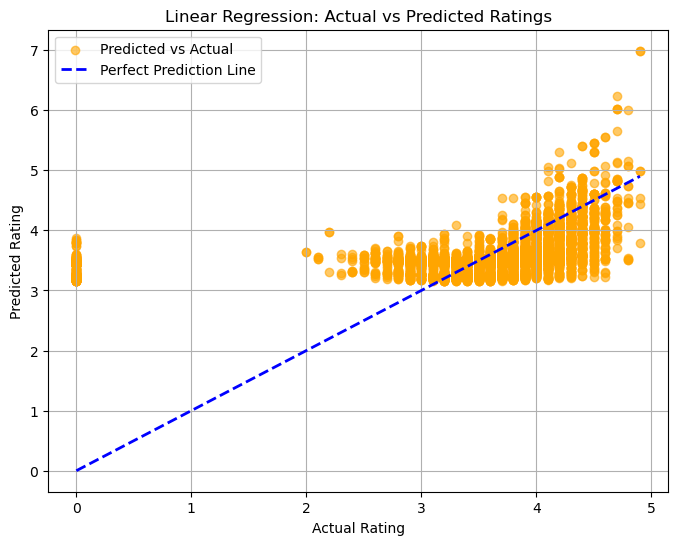

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\CleanedData\\cleaned_data.csv")

X = df[['votes', 'cost', 'online_order', 'booking']].copy()
y = df['rating']

# Map 'Yes'/'No' to 1/0
X['online_order'] = X['online_order'].map({'Yes': 1, 'No': 0})
X['booking'] = X['booking'].map({'Yes': 1, 'No': 0})

# Convert 'votes' and 'cost' columns to float before assigning scaled values
X = X.astype({'votes': 'float64', 'cost': 'float64'})

# Scale numeric features
scaler = StandardScaler()
X[['votes', 'cost']] = scaler.fit_transform(X[['votes', 'cost']])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.legend()
plt.grid(True)
plt.savefig("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\Visualizations\\actual_vs_predicted_ratings.png", dpi=300, bbox_inches='tight')
plt.show()

# 📊 Linear Regression Model Report

## 🎯 Objective

To build a linear regression model that predicts restaurant ratings based on features like:
- Votes
- Cost
- Online Order availability
- Table Booking option

---

## 📁 Dataset Information

- **Features used**: `votes`, `cost`, `online_order`, `booking`
- **Target**: `rating`

---

## ⚙️ Model Used

**Linear Regression** was chosen to estimate continuous numeric values (ratings) from numerical and categorical inputs.

---

## ✅ Model Evaluation Metrics

- **Mean Absolute Error (MAE)**: `0.4628`  
- **Mean Squared Error (MSE)**: `0.6480`  
- **Root Mean Squared Error (RMSE)**: `0.8050`  
- **R-squared (R² Score)**: `0.1603`

---

## 📌 Interpretation

- **MAE** of `0.46` means the average prediction error is around ±0.46 stars.
- **R² Score** of `0.16` indicates the model explains ~16% of the variation in ratings using the selected features.
- Although not very high, the result suggests that **votes, cost, and service options** have **some influence** on the rating, but other hidden factors (like food quality, ambience, etc.) likely contribute more.

---

## ✅ Conclusion

The Linear Regression model gives a basic understanding of how restaurant features influence ratings. For better accuracy, more descriptive features (like review sentiment, cuisine type, etc.) can be added in future models.
